In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [20]:
# Loading the dataset
data = pd.read_csv('C:/Users/shaje/OneDrive/Documents/NCL Internship/6_2023_113.csv')

In [21]:
data.head()

,bulk_id,car_reg_no,vehicle_speed,heading,distance,altitude,o_s1_b1_voltage,o_s2_b2_voltage,o_s1_current,calculated_engine_load,...,egr_error,absolute_barometric_pressure,engine_coolant_temperature,intake_air_temperature,catalyst_temperature_b1_s1,catalyst_temperature_b1_s2,ambient_air_temperature,time_stamp,latitude,longitude
0,6498473,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-06-18 15:43:34,0.0,0.0
1,6498472,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-06-18 15:43:32,0.0,0.0
2,6498471,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-06-18 15:43:28,0.0,0.0
3,6498470,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-06-18 15:43:26,0.0,0.0
4,6498469,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-06-18 15:43:24,0.0,0.0


In [22]:
data.shape

(35118, 41)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35118 entries, 0 to 35117
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   bulk_id                               35118 non-null  int64  
 1   car_reg_no                            35118 non-null  int64  
 2   vehicle_speed                         35118 non-null  float64
 3   heading                               35118 non-null  float64
 4   distance                              0 non-null      float64
 5   altitude                              35118 non-null  float64
 6   o_s1_b1_voltage                       0 non-null      float64
 7   o_s2_b2_voltage                       33877 non-null  float64
 8   o_s1_current                          33872 non-null  float64
 9   calculated_engine_load                33873 non-null  float64
 10  engine_rpm                            33863 non-null  float64
 11  spark_advance  

In [24]:
data.isnull().sum()

bulk_id                                     0
car_reg_no                                  0
vehicle_speed                               0
heading                                     0
distance                                35118
altitude                                    0
o_s1_b1_voltage                         35118
o_s2_b2_voltage                          1241
o_s1_current                             1246
calculated_engine_load                   1245
engine_rpm                               1255
spark_advance                            1261
absolute_load_value                      1272
throttle_position                        1272
relative_throttle_position               1273
absolute_throttle_position               1281
ap_pos_d                                 1308
ap_pos_e                                 1322
commanded_exhaust_gas_recirculation     35118
commanded_evaporative_purge              1331
commanded_throttle_actuator             35118
fuel_rail_pressure                

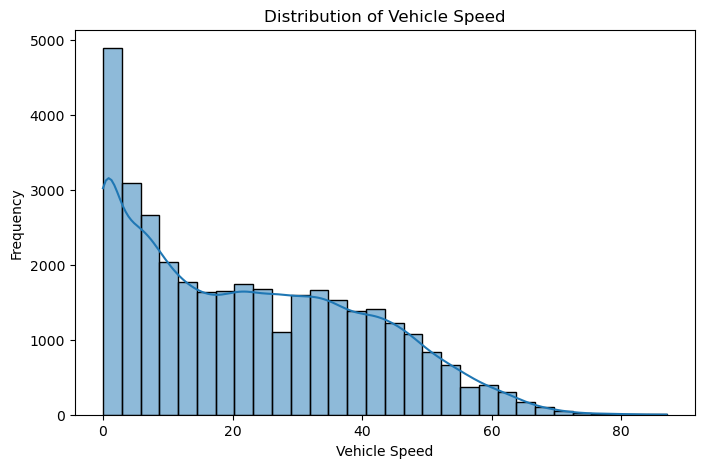

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of the target variable (vehicle_speed)
plt.figure(figsize=(8, 5))
sns.histplot(data['vehicle_speed'], kde=True, bins=30)
plt.title('Distribution of Vehicle Speed')
plt.xlabel('Vehicle Speed')
plt.ylabel('Frequency')
plt.show()

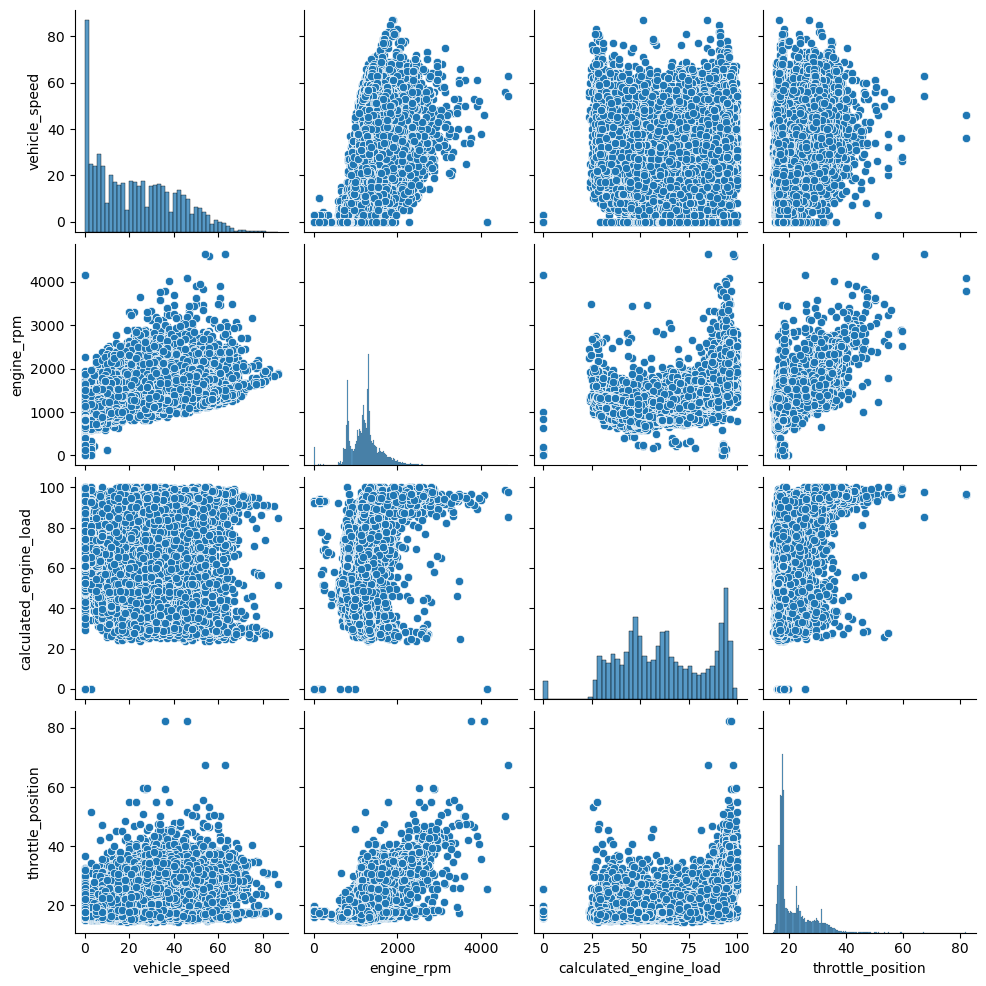

In [26]:
# Pairplot of selected features and target
selected_features = ['vehicle_speed', 'engine_rpm', 'calculated_engine_load', 'throttle_position']
sns.pairplot(data[selected_features])
plt.show()

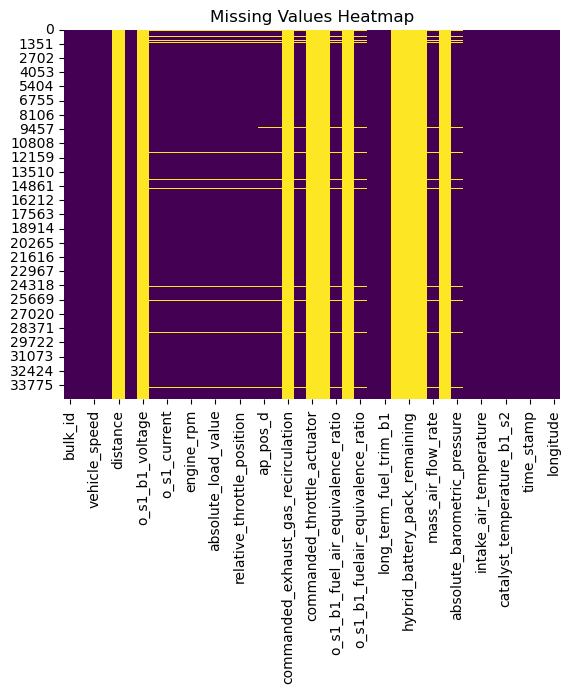

In [27]:
# Missing values heatmap
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

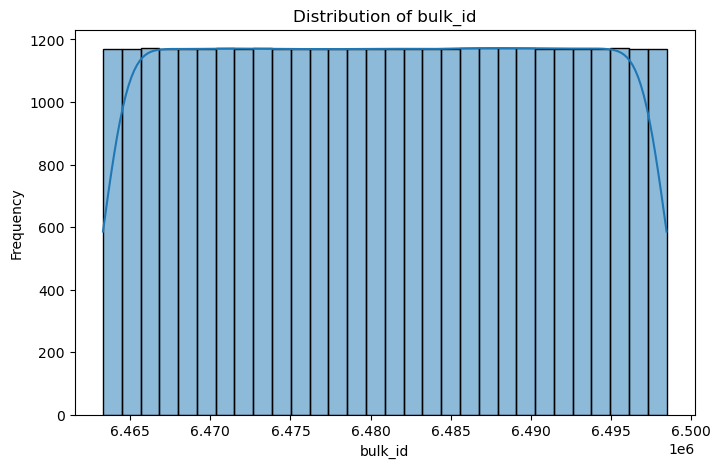

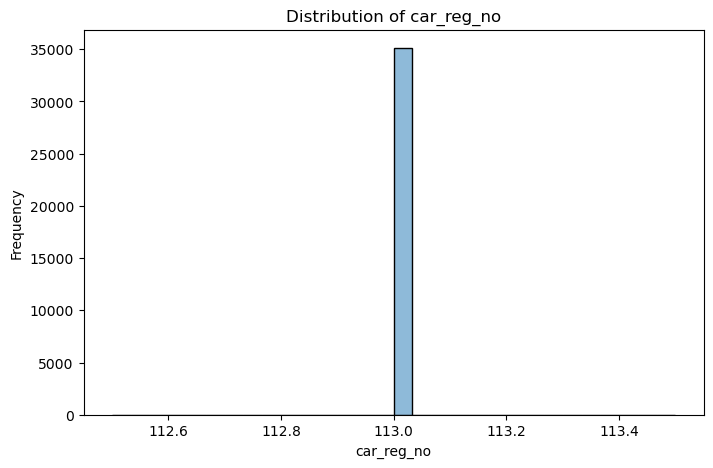

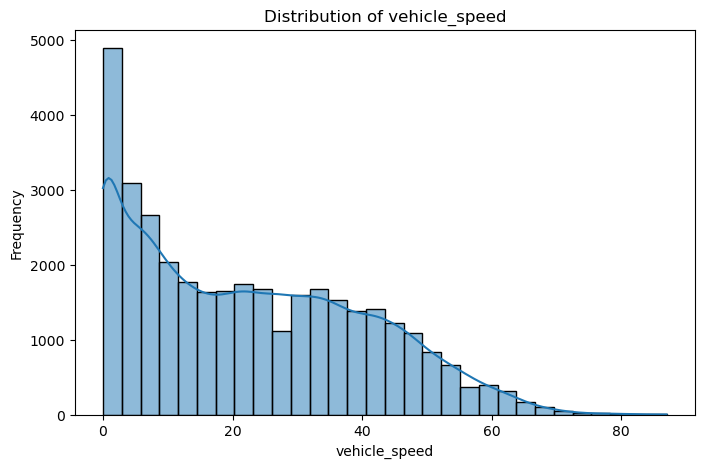

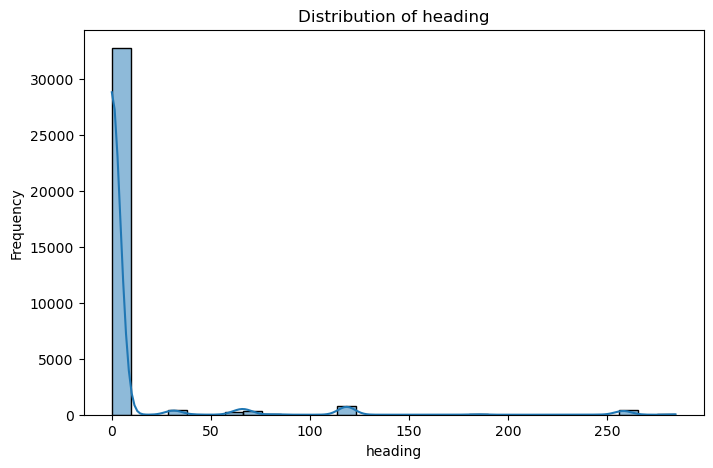

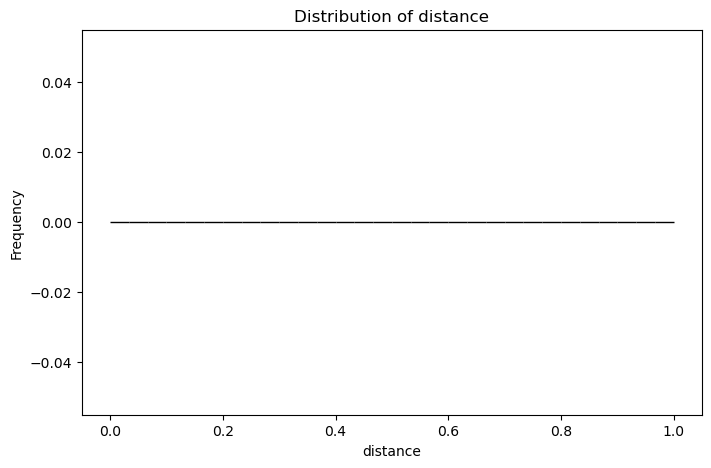

In [28]:
# Plot distributions for key numerical features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns[:5]:  # Adjust to include all columns or select top N
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

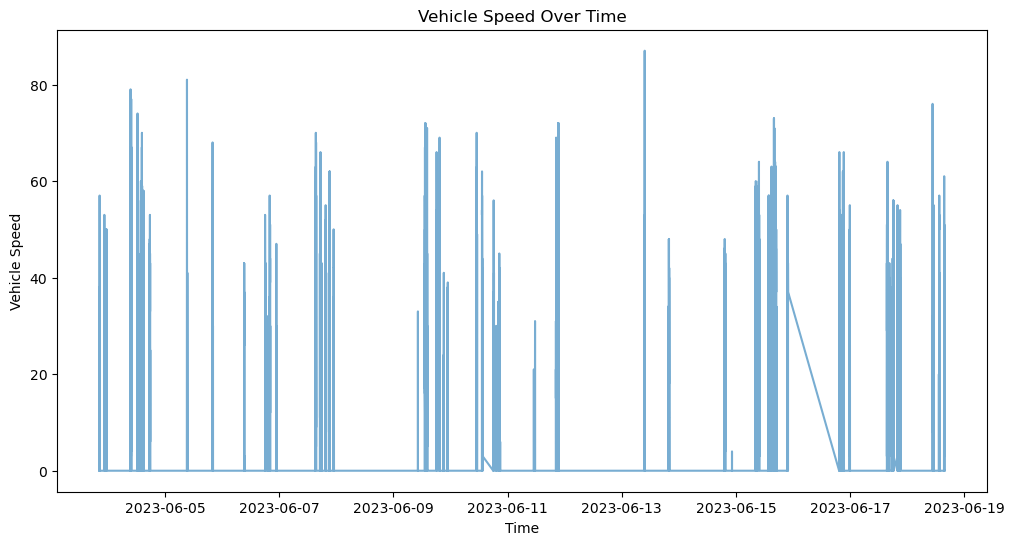

In [29]:
# Converting time_stamp to datetime if not done already
data['time_stamp'] = pd.to_datetime(data['time_stamp'])

# Visualizing vehicle_speed over time
plt.figure(figsize=(12, 6))
plt.plot(data['time_stamp'], data['vehicle_speed'], alpha=0.6)
plt.title('Vehicle Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Vehicle Speed')
plt.show()

In [30]:
# Drop irrelevant or fully null columns
columns_to_drop = [
    'distance', 'o_s1_b1_voltage', 'commanded_exhaust_gas_recirculation', 
    'commanded_throttle_actuator', 'fuel_rail_pressure', 'fuel_tank_level_input',
    'fuel_air_commanded_equivalence_ratio', 'hybrid_battery_pack_remaining',
    'intake_manifold_absolute_pressure', 'egr_error', 'catalyst_temperature_b1_s1',
    'catalyst_temperature_b1_s2'
]
data_cleaned = data.drop(columns=columns_to_drop, axis=1)

In [31]:
# Impute missing values with column means
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numerical_columns] = imputer.fit_transform(data_cleaned[numerical_columns])

In [32]:
# Convert time_stamp to datetime
data_cleaned['time_stamp'] = pd.to_datetime(data_cleaned['time_stamp'])

In [33]:
# Confirm data cleaning
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35118 entries, 0 to 35117
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   bulk_id                             35118 non-null  float64       
 1   car_reg_no                          35118 non-null  float64       
 2   vehicle_speed                       35118 non-null  float64       
 3   heading                             35118 non-null  float64       
 4   altitude                            35118 non-null  float64       
 5   o_s2_b2_voltage                     35118 non-null  float64       
 6   o_s1_current                        35118 non-null  float64       
 7   calculated_engine_load              35118 non-null  float64       
 8   engine_rpm                          35118 non-null  float64       
 9   spark_advance                       35118 non-null  float64       
 10  absolute_load_value   

In [34]:
# Define features (X) and target (y)
X = data_cleaned.drop(columns=['vehicle_speed', 'time_stamp'])  # Features
y = data_cleaned['vehicle_speed']  # Target

In [35]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [40]:
# Predictions
y_pred_train_rf = rf_model.predict(X_train_scaled)
y_pred_test_rf = rf_model.predict(X_test_scaled)

In [41]:
# Evaluate Random Forest
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

In [42]:
print(f"Random Forest - Train RMSE: {rmse_train_rf}, Test RMSE: {rmse_test_rf}")
print(f"Random Forest - Train R²: {r2_train_rf}, Test R²: {r2_test_rf}")

Random Forest - Train RMSE: 2.576813916059549, Test RMSE: 6.871401324662866
Random Forest - Train R²: 0.979129303305578, Test R²: 0.8509536525242702


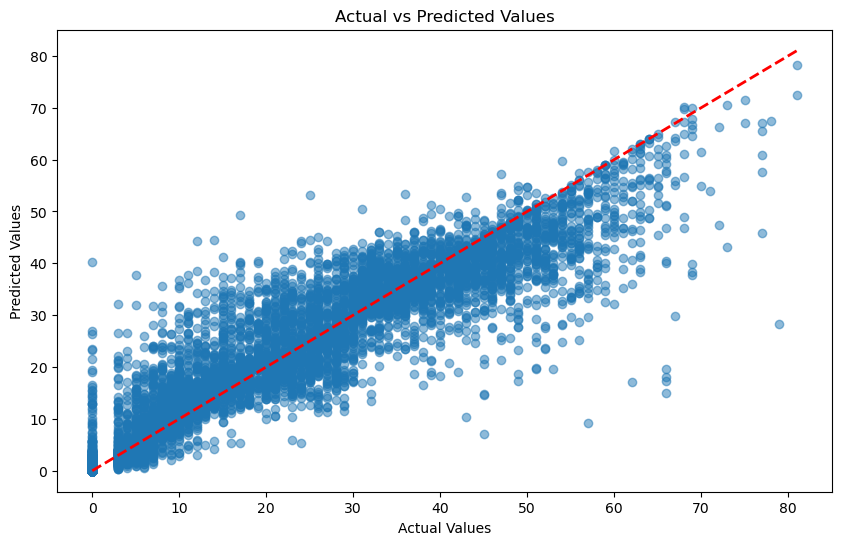

In [43]:
# Actual vs Predicted for the Test Set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [44]:
# Ensure the time_stamp column is in datetime format
data['time_stamp'] = pd.to_datetime(data['time_stamp'])

In [45]:
# Filter out rows where vehicle speed is greater than zero (indicating movement)
moving_data = data[data['vehicle_speed'] > 0]